In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")

df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')


In [3]:
df = df = df[(df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975))]



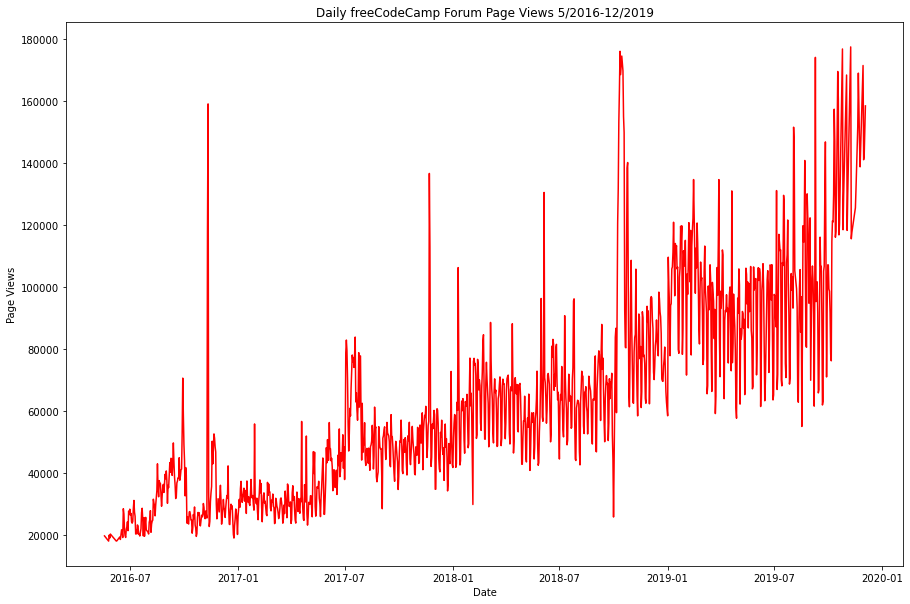

In [5]:
# Draw line plot
plt.figure(figsize=(15, 10))
plt.plot(df["value"], color = "red")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()

In [6]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

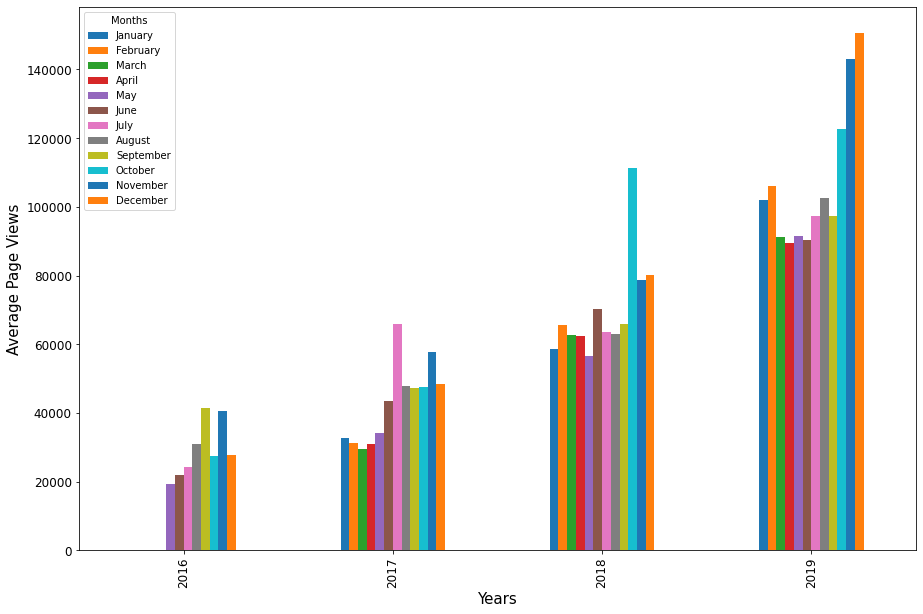

In [7]:
# Draw bar plot
df_bar.plot(kind ="bar", legend = True, figsize = (15,10))
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Average Page Views", fontsize= 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

Text(0, 0.5, 'Page Views')

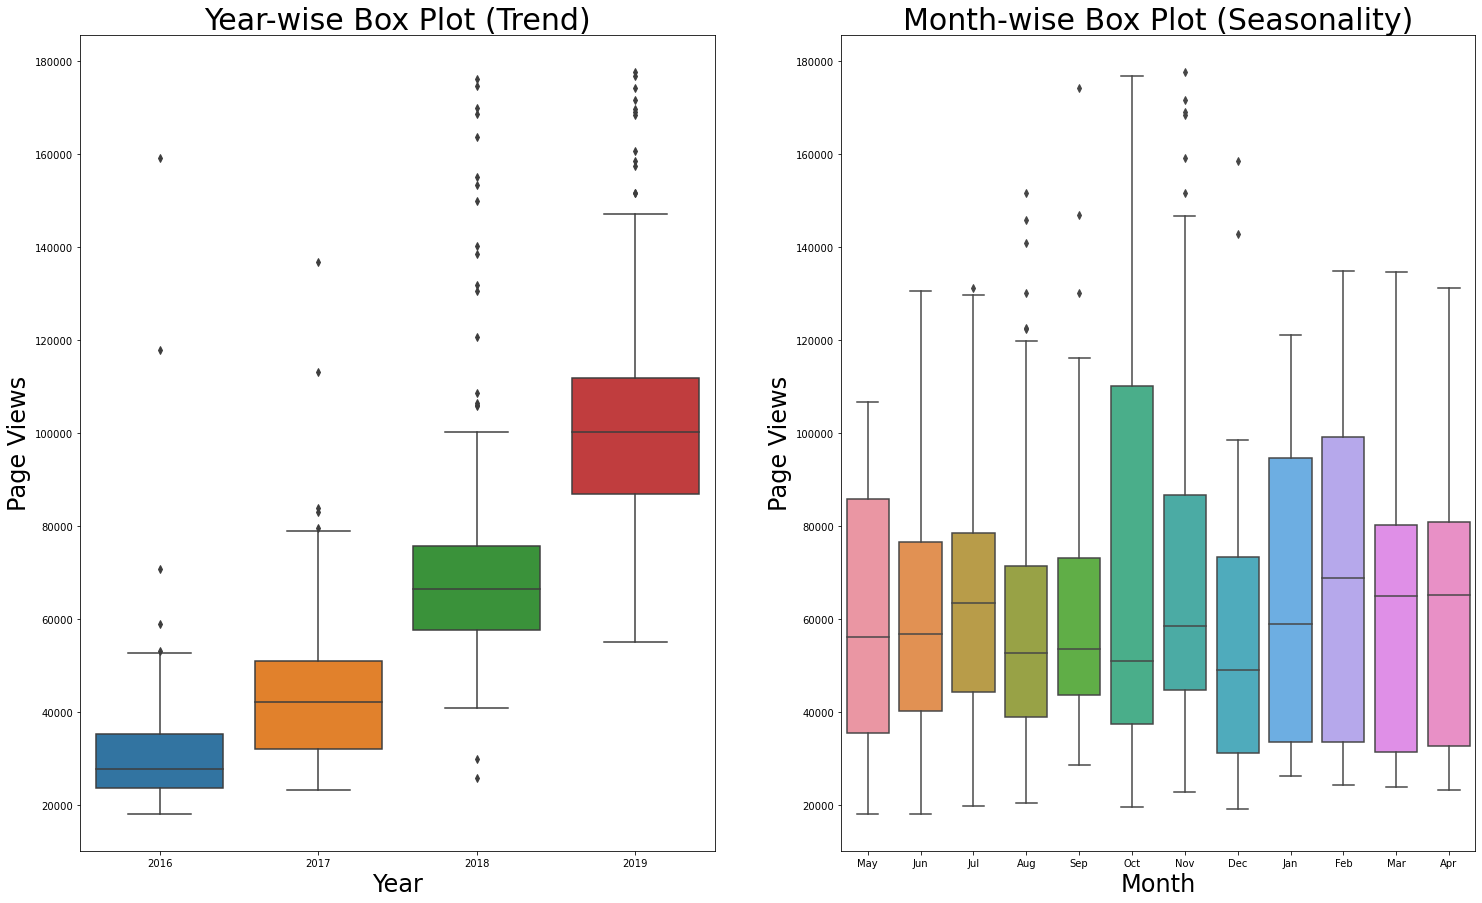

In [8]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1,2, figsize=(25,15))
sns.boxplot(ax=ax[0],x=df_box["year"], y=df_box["value"])
ax[0].set_title("Year-wise Box Plot (Trend)", fontsize = 30)
ax[0].set_xlabel("Year", fontsize = 24)
ax[0].set_ylabel("Page Views",fontsize  =24)

sns.boxplot(ax=ax[1],x=df_box["month"], y=df_box["value"])
ax[1].set_title("Month-wise Box Plot (Seasonality)", fontsize = 30)
ax[1].set_xlabel("Month", fontsize = 24)
ax[1].set_ylabel("Page Views",fontsize  =24)
